In [4]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [5]:
df=pd.read_csv("wine_food_pairings.csv")

In [6]:
df

,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label,description
0,Syrah/Shiraz,Red,smoked sausage,Smoky BBQ,Spanish,2,Poor,Heuristic pairing assessment.
1,Grenache,Red,charcuterie board,Salty Snack,French,3,Neutral,Heuristic pairing assessment.
2,Madeira,Fortified,lemon tart,Dessert,French,4,Good,Acidic wine balances acidic food.
3,Cabernet Sauvignon,Red,roast lamb,Red Meat,Mexican,5,Excellent,Tannic red complements red meat fat.
4,Viognier,White,duck à l’orange,Poultry,Vietnamese,2,Poor,Heuristic pairing assessment.
...,...,...,...,...,...,...,...,...
34928,Merlot,Red,mac and cheese,Cheese,Greek,5,Excellent,Idealized perfect pairing example for contrast.
34929,Sauternes,Dessert,grilled ribeye,Red Meat,Spanish,5,Excellent,Idealized perfect pairing example for contrast.
34930,Sauternes,Dessert,fondue,Cheese,Mexican,1,Terrible,Deliberately bad pairing example for contrast.
34931,Zinfandel,Red,beef stew,Red Meat,Mexican,5,Excellent,Idealized perfect pairing example for contrast.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34933 entries, 0 to 34932
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   wine_type        34933 non-null  object
 1   wine_category    34933 non-null  object
 2   food_item        34933 non-null  object
 3   food_category    34933 non-null  object
 4   cuisine          34933 non-null  object
 5   pairing_quality  34933 non-null  int64 
 6   quality_label    34933 non-null  object
 7   description      34933 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [8]:
df.columns

Index(['wine_type', 'wine_category', 'food_item', 'food_category', 'cuisine',
       'pairing_quality', 'quality_label', 'description'],
      dtype='object')

In [9]:
df.dtypes

wine_type          object
wine_category      object
food_item          object
food_category      object
cuisine            object
pairing_quality     int64
quality_label      object
description        object
dtype: object

In [10]:
df.head()

,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label,description
0,Syrah/Shiraz,Red,smoked sausage,Smoky BBQ,Spanish,2,Poor,Heuristic pairing assessment.
1,Grenache,Red,charcuterie board,Salty Snack,French,3,Neutral,Heuristic pairing assessment.
2,Madeira,Fortified,lemon tart,Dessert,French,4,Good,Acidic wine balances acidic food.
3,Cabernet Sauvignon,Red,roast lamb,Red Meat,Mexican,5,Excellent,Tannic red complements red meat fat.
4,Viognier,White,duck à l’orange,Poultry,Vietnamese,2,Poor,Heuristic pairing assessment.


In [11]:
df.tail()

,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label,description
34928,Merlot,Red,mac and cheese,Cheese,Greek,5,Excellent,Idealized perfect pairing example for contrast.
34929,Sauternes,Dessert,grilled ribeye,Red Meat,Spanish,5,Excellent,Idealized perfect pairing example for contrast.
34930,Sauternes,Dessert,fondue,Cheese,Mexican,1,Terrible,Deliberately bad pairing example for contrast.
34931,Zinfandel,Red,beef stew,Red Meat,Mexican,5,Excellent,Idealized perfect pairing example for contrast.
34932,Albariño,White,roast lamb,Red Meat,Middle Eastern,5,Excellent,Idealized perfect pairing example for contrast.


In [12]:
df.drop(columns='description')

,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label
0,Syrah/Shiraz,Red,smoked sausage,Smoky BBQ,Spanish,2,Poor
1,Grenache,Red,charcuterie board,Salty Snack,French,3,Neutral
2,Madeira,Fortified,lemon tart,Dessert,French,4,Good
3,Cabernet Sauvignon,Red,roast lamb,Red Meat,Mexican,5,Excellent
4,Viognier,White,duck à l’orange,Poultry,Vietnamese,2,Poor
...,...,...,...,...,...,...,...
34928,Merlot,Red,mac and cheese,Cheese,Greek,5,Excellent
34929,Sauternes,Dessert,grilled ribeye,Red Meat,Spanish,5,Excellent
34930,Sauternes,Dessert,fondue,Cheese,Mexican,1,Terrible
34931,Zinfandel,Red,beef stew,Red Meat,Mexican,5,Excellent


In [13]:
df["cuisine"].unique()

array(['Spanish', 'French', 'Mexican', 'Vietnamese', 'Argentinian',
       'Moroccan', 'Italian', 'American BBQ', 'German', 'Thai',
       'Middle Eastern', 'Japanese', 'Chinese (Sichuan)', 'Ethiopian',
       'Greek', 'Korean', 'Indian'], dtype=object)

In [14]:
df["quality_label"].unique()

array(['Poor', 'Neutral', 'Good', 'Excellent', 'Terrible'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le

LabelEncoder()

In [16]:
df["quality_label"]=le.fit_transform(df["quality_label"])
df

,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label,description
0,Syrah/Shiraz,Red,smoked sausage,Smoky BBQ,Spanish,2,3,Heuristic pairing assessment.
1,Grenache,Red,charcuterie board,Salty Snack,French,3,2,Heuristic pairing assessment.
2,Madeira,Fortified,lemon tart,Dessert,French,4,1,Acidic wine balances acidic food.
3,Cabernet Sauvignon,Red,roast lamb,Red Meat,Mexican,5,0,Tannic red complements red meat fat.
4,Viognier,White,duck à l’orange,Poultry,Vietnamese,2,3,Heuristic pairing assessment.
...,...,...,...,...,...,...,...,...
34928,Merlot,Red,mac and cheese,Cheese,Greek,5,0,Idealized perfect pairing example for contrast.
34929,Sauternes,Dessert,grilled ribeye,Red Meat,Spanish,5,0,Idealized perfect pairing example for contrast.
34930,Sauternes,Dessert,fondue,Cheese,Mexican,1,4,Deliberately bad pairing example for contrast.
34931,Zinfandel,Red,beef stew,Red Meat,Mexican,5,0,Idealized perfect pairing example for contrast.


In [17]:
df.shape

(34933, 8)

In [18]:
df.describe()

,pairing_quality,quality_label
count,34933.000000,34933.000000
mean,3.015115,1.984885
std,1.409591,1.409591
min,1.000000,0.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,4.000000,3.000000
max,5.000000,4.000000


In [19]:
df.isnull().sum()

wine_type          0
wine_category      0
food_item          0
food_category      0
cuisine            0
pairing_quality    0
quality_label      0
description        0
dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["wine_type"]=le.fit_transform(df["wine_type"])
df["wine_category"]=le.fit_transform(df["wine_category"])
df["food_item"]=le.fit_transform(df["food_item"])
df["food_category"]=le.fit_transform(df["food_category"])
df["cuisine"]=le.fit_transform(df["cuisine"])
df["description"]=le.fit_transform(df["description"])

In [21]:
df

,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label,description
0,23,2,34,9,14,2,3,8
1,9,2,10,7,4,3,2,8
2,12,1,24,3,4,4,1,0
3,2,2,32,6,11,5,0,18
4,26,5,17,5,16,2,3,8
...,...,...,...,...,...,...,...,...
34928,14,2,25,1,6,5,0,10
34929,21,0,22,6,14,5,0,10
34930,21,0,19,1,11,1,4,4
34931,28,2,7,6,11,5,0,10


Text(0.5, 1.0, 'Before Outlier')

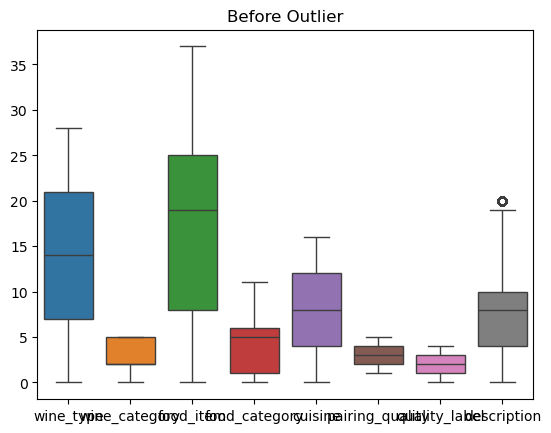

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data=df)
plt.title("Before Outlier")

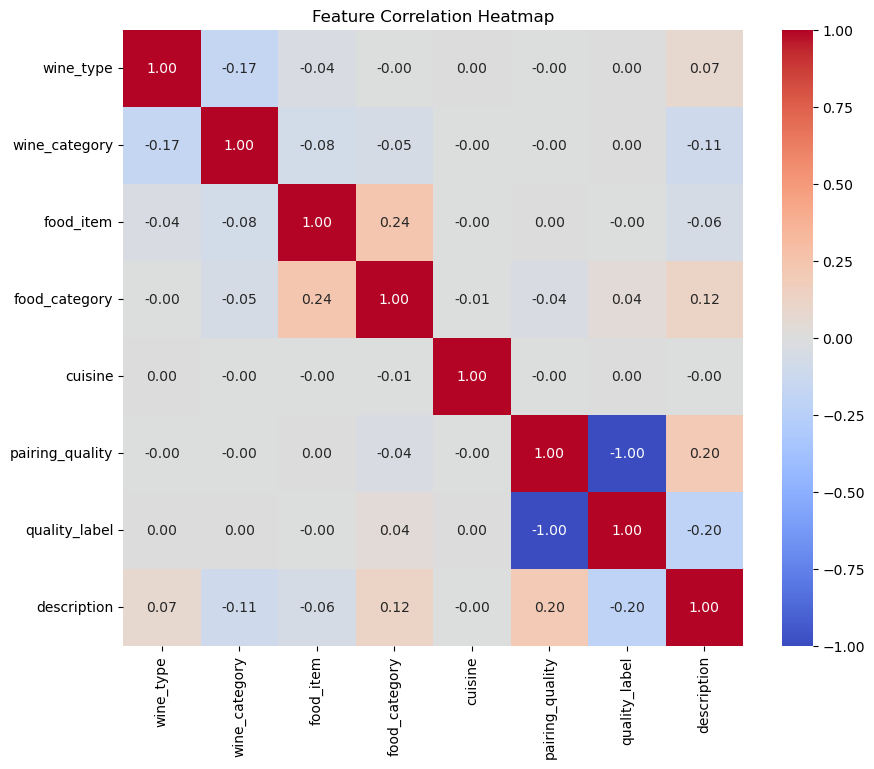

In [23]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


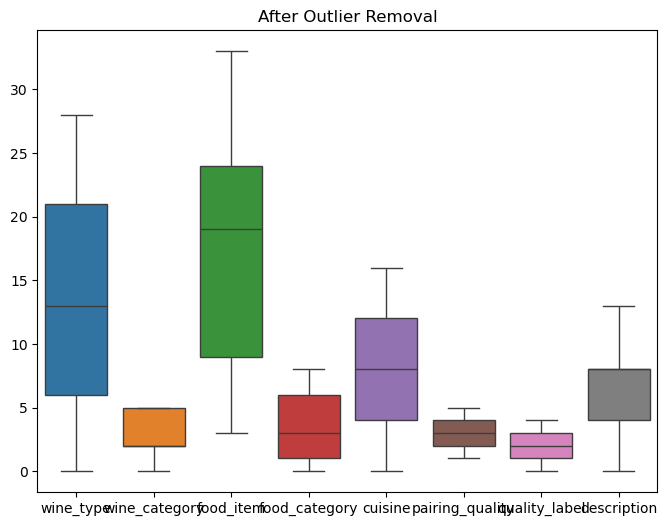

In [24]:
numeric_cols=df.select_dtypes(include="number").columns
df_clean=df.copy()
for col in numeric_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q1+1.5*IQR
    df_clean=df_clean[(df_clean[col]>=lower_bound)&(df_clean[col]<=upper_bound)]

plt.figure(figsize=(8,6))
sns.boxplot(data=df_clean)
plt.title("After Outlier Removal")
plt.show()

In [25]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [26]:
x

,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label
0,23,2,34,9,14,2,3
1,9,2,10,7,4,3,2
2,12,1,24,3,4,4,1
3,2,2,32,6,11,5,0
4,26,5,17,5,16,2,3
...,...,...,...,...,...,...,...
34928,14,2,25,1,6,5,0
34929,21,0,22,6,14,5,0
34930,21,0,19,1,11,1,4
34931,28,2,7,6,11,5,0


In [27]:
y

0         8
1         8
2         0
3        18
4         8
         ..
34928    10
34929    10
34930     4
34931    10
34932    10
Name: description, Length: 34933, dtype: int32

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)
scaled_data

array([[ 1.14833078, -0.44843849,  1.63903661, ...,  1.22045548,
        -0.7201587 ,  0.7201587 ],
       [-0.59360384, -0.44843849, -0.80512258, ..., -0.81960344,
        -0.01072287,  0.01072287],
       [-0.22033214, -1.00867386,  0.62063695, ..., -0.81960344,
         0.69871295, -0.69871295],
       ...,
       [ 0.89948298, -1.56890924,  0.11143711, ...,  0.6084378 ,
        -1.42959452,  1.42959452],
       [ 1.77045029, -0.44843849, -1.11064248, ...,  0.6084378 ,
         1.40814878, -1.40814878],
       [-1.71341896,  1.23226765,  1.43535668, ...,  0.8124437 ,
         1.40814878, -1.40814878]])

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [30]:
x_train

,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label
277,0,5,3,2,0,2,3
18257,26,5,20,0,11,2,3
11687,10,5,37,11,14,3,2
7829,4,4,23,8,3,3,2
34044,26,5,20,0,6,5,0
...,...,...,...,...,...,...,...
23375,25,5,32,6,0,3,2
28650,7,2,8,0,15,4,1
1354,17,1,25,1,5,1,4
21403,24,2,25,1,4,4,1


In [31]:
y_train

277      20
18257    14
11687     8
7829      3
34044    10
         ..
23375     5
28650     8
1354      4
21403     8
28426    10
Name: description, Length: 24453, dtype: int32

In [32]:
y_train.head(10)

277      20
18257    14
11687     8
7829      3
34044    10
31777     4
7276      8
3332      8
16874     4
10467    12
Name: description, dtype: int32

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train

,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label
29563,18,3,15,0,16,1,4
34617,22,5,11,1,6,1,4
10589,9,2,10,7,0,4,1
7107,14,2,32,6,14,4,1
2717,25,5,1,10,3,4,1
...,...,...,...,...,...,...,...
21087,8,5,20,0,13,2,3
15289,8,5,20,0,7,5,0
25016,19,5,11,1,2,4,1
22955,4,4,5,6,8,2,3


In [34]:
y_train

29563     4
34617     4
10589     8
7107     18
2717      8
         ..
21087    14
15289    10
25016     8
22955     5
1915      3
Name: description, Length: 24453, dtype: int32

In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [36]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred=classifier.predict(x_test)

In [42]:
print(y_pred)

[ 8  8 10 ... 10  0  8]


In [43]:
print(y_test.values)

[ 8  8 10 ... 10  0  8]


In [44]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix
print("Accuracy_score: %f" %(accuracy_score(y_test,y_pred)*100))

Accuracy_score: 97.471374


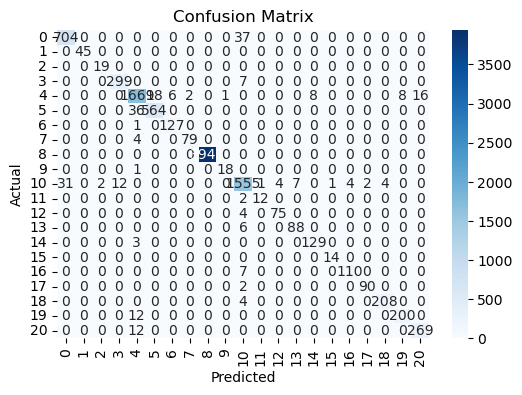

In [45]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='d',cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

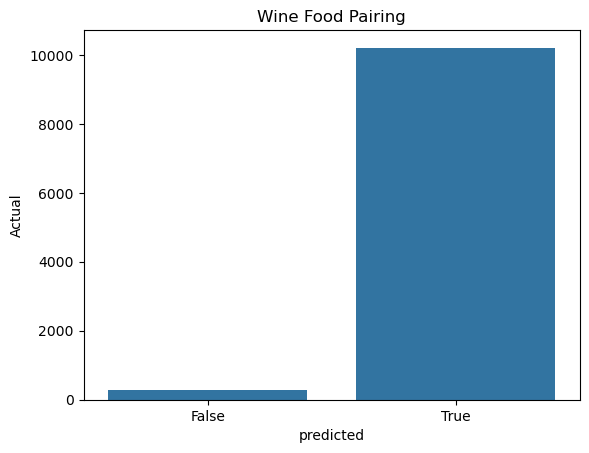

In [46]:
sns.countplot(x=y_test==y_pred)
plt.title("Wine Food Pairing")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()